<a href="https://colab.research.google.com/github/RosariaTornisiello/Machine_Learning/blob/main/Fashion_MNIST_TornisielloRosaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion_MNIST Applied Machine Learning project 
## Master Course in Bioinformatics
## Rosaria Tornisiello

## The Fashion MNIST dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
Each training and test example is assigned to one of the following labels:<br/>
0	T-shirt/top<br/> 1	Trouser<br/>  2	Pullover<br/>  3	Dress<br/>   4	Coat<br/>  5	Sandal<br/>  6	Shirt<br/>  7	Sneaker<br/>  8	Bag<br/>  9	Ankle boot<br/>
The final aim of this project is to develop a model that is able to classify images of clothing into one of the previous listed classes, with high accuracy.<br/>


## 1. Importing and inspecting the data
The first cell is used to install a tool to estimate the time needed to run each cell.


In [108]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.78 s


Now some useful libraries are imported:

In [109]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

time: 3.38 ms


In the next cell the Fashion MNIST dataset is imported from keras. In particular, the tf.keras.datasets module provide a few toy datasets (already-vectorized, in Numpy format).

In [110]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

time: 454 ms


Now let's inspect a bit the data:

In [111]:
print('train_images.shape:', train_images.shape)
print('number of train labels:', len(train_labels))
print('test_images.shape:', test_images.shape)
print('number of test labels:', len(test_labels))

train_images.shape: (60000, 28, 28)
number of train labels: 60000
test_images.shape: (10000, 28, 28)
number of test labels: 10000
time: 3.35 ms


## 2. Visualization
The next cell will show 25 images belonging to the train set.

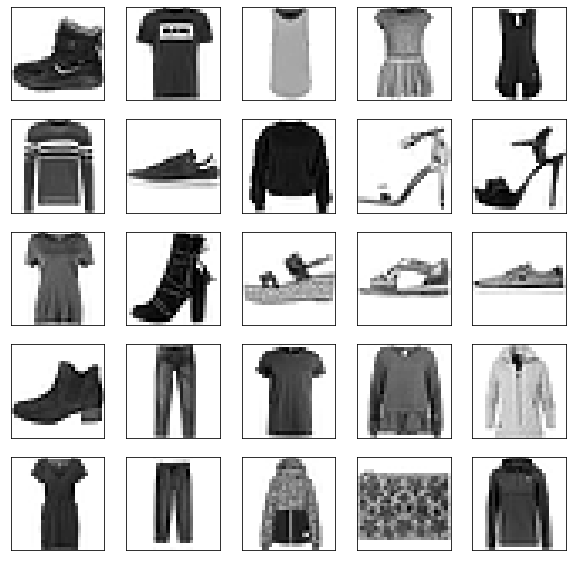

time: 1.25 s


In [112]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

As it is possible to see in the next plot, all classes are equally represented in the train dataset.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'classes counts'), Text(0.5, 0, 'classes')]

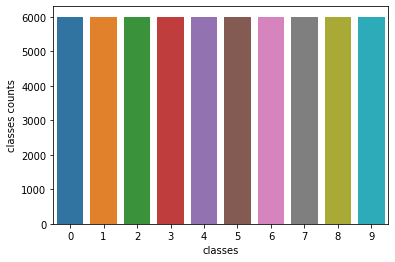

time: 235 ms


In [113]:
count_plot = sns.countplot(train_labels)
count_plot.set(xlabel='classes', ylabel='classes counts')

## 3. Decision Tree
The first approach I decided to try is the generation of a decision tree which falls under the category of supervised learning. This kind of models can be used to solve both regression and classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

In [114]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
train_images1 = train_images.flatten().reshape(60000,784)
test_images1 = test_images.flatten().reshape(10000,784)

tree_clf = tree.DecisionTreeClassifier(max_depth=10)
tree_clf.fit(train_images1,train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 18.1 s


In the next cell I tried to plot the tree but, given its dimensions, it is difficult to visualize it either writing it in a png image or plotting it in the cell output.

In [115]:
#import graphviz
#import pydotplus
#from IPython.display import Image
#dot_data = tree.export_graphviz(tree_clf, out_file=None,
#                                class_names=class_names, 
#                                filled=True, rounded=True, 
#                                special_characters=True)  
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"10,10!"')
#pydot_graph.write_png('decision_tree.png')
#Image(pydot_graph.create_png())

time: 3.04 ms


In [116]:
clf_predictons = tree_clf.predict(test_images1)

time: 20.5 ms


Now let's evaluate the model:

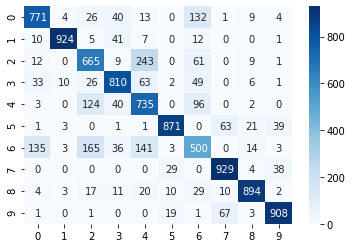

time: 757 ms


In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score

cf_matrix = confusion_matrix(test_labels, clf_predictons)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

In [118]:
print("Accuracy:", accuracy_score(test_labels, clf_predictons))

Accuracy: 0.8007
time: 2.51 ms


The confusion matrix shows that a large part of the test set is well classified, indeed I obtained a decent accuracy. The model is clearly misclaffying especially classes 4 (coat) and 6 (shirt). It seems that the coat is sometimes confused with the class 2 (pullover) and with class 6 (and viceversa). Class 6 is sometimes confused with class 0 (T-shirt). Actually, these items look similar, instead it is very rare that an item of class 9 (ankle boot) is confused wiht one of class 0 since the correspondant images have nothing in common.
Let's try a more complex model to increase the performance. 

## 4. Random forest
Random forest is a learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, accuracy_score

time: 2.42 ms


In [120]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_images1,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

time: 1min 24s


In [121]:
forest_predictions = model.predict(test_images1)

time: 415 ms


In [122]:
c_report = classification_report(test_labels, forest_predictions)
print("Classification Report:",'\n',c_report)

accuracy = accuracy_score(test_labels,forest_predictions)
print("Accuracy: ",accuracy)

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.79      0.77      1000
           3       0.88      0.90      0.89      1000
           4       0.76      0.81      0.78      1000
           5       0.97      0.96      0.97      1000
           6       0.73      0.60      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Accuracy:  0.8763
time: 31.7 ms


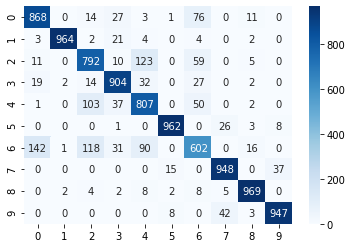

time: 744 ms


In [123]:
cf_matrix = confusion_matrix(test_labels, forest_predictions)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

Clearly, the Random Forest classifier performed better than the simpler Decision Tree. The accuracy increased up to 87% which is, however, improvable. Evene increasing the number of estimators, the accuracy remained constant (code is not shown). 

## 5. Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. This method is very useful to detect overfitting.

Here I used the k-fold cross-validation, which splits the input data into k subsets of data (also known as folds). The ML model is trained on all but one (k-1) of the subsets, and then the model is evaluated on the subset that was not used for training. This process is repeated k times, with a different subset reserved for evaluation (and excluded from training) each time. In this case I used the most basic k-fold cross validation which splits the dataset in 5 subsets.

In [124]:
from sklearn.model_selection import cross_val_score

x = np.vstack((test_images1,train_images1))
y = np.concatenate((test_labels, train_labels))
score = cross_val_score(model, x,y,cv=5, scoring="accuracy")
print (np.mean(score))

0.8829
time: 6min 33s


The accuracy obtained is similar to the one obtained using a simple train/test split, this suggests that there is not overfitting in the previous models. <br/> Since several models with accuracy ~91% have been developed, I'll try more complex models such as a CNN but first, let's prepare the data.

## 6. Preparing the data

#### 6.1 Rescaling
Pixels are represented in the range [0-255], but the NN converges faster with smaller values, in the range [0-1] so they are normalized to this range.

In [125]:
train_images = train_images / 255.0
test_images = test_images / 255.0

time: 216 ms


#### 6.2 Reshape
It is necessary to convert the array from 3 dimensions to 4 dimensions so that it is suitable for keras API.

In [126]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

time: 2.64 ms


#### 6.3 Converting to floats
It is also convenient to make sure that all the values are floats. 



In [127]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

time: 83.6 ms


#### 6.4 One hot encoding of label
At this point in the notebook the labels vary in the range [0-9], but in order to define the type of loss for the NN later, which in this case is categorical_crossentropy, the targets should be in categorical format (=one hot-vectors). 

In [128]:
from keras.utils.np_utils import to_categorical

nclasses = 10
train_labels = to_categorical(train_labels, num_classes = nclasses )
test_labels = to_categorical(test_labels, num_classes = nclasses )
print("Shape of train_labels: ", train_labels.shape) 
print("Shape of test_labels: ", test_labels.shape)

Shape of train_labels:  (60000, 10)
Shape of test_labels:  (10000, 10)
time: 9.67 ms


### 7 CNN 
In neural networks, Convolutional neural network (CNN) is one of the main categories to do images classifications. Instead of preprocessing the data to derive features, a CNN takes just the image's raw pixel data as input and "learns" how to extract these features, and ultimately infer what object they constitute. CNN uses some layers to gather information and determine some features from the image. These layers are:
* Convolution: this process is main process for CNN. In this operation there is a feature detector or filter. This filter detects edges or specific shapes. Filter is placed top left of image and multiplied with value on same indices. After that all results are summed and this result is written to output matrix. Then filter slips to right to do this whole processes again and again. 
* Pooling: this layer is used for reducing parameters and computating process. Also by using this layer features invariant to scale or orientation changes are detected and it prevents overfitting. There are some pooling process like average pooling, max pooling etc.
* Flattening: basically flattening is taking matrix came from convolutional and pooling processes and turn it into one dimensional array. 
* Full Connection (Dense): this layer takes data from one dimension array described above and starts learning process.

Finally, I used also dropout that is a regularization technique for reducing overfitting. It is called “dropout” because it drops out visible or hidden units in neural network.
#### 7.1 Basic model
Firstly, I generated a basic CNN. The details are shown in the model summary.

In [129]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import Adam


time: 2.53 ms


In [130]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(nclasses, activation='softmax'))

model.summary()


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________
time: 55.3 ms


In [131]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

time: 11.6 ms


In [132]:
epochs = 25
batch_size = 256

history = model.fit(x=train_images, 
                    y=train_labels, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/25
211/211 [==============================] - 1s 6ms/step - loss: 0.4631 - accuracy: 0.8397 - val_loss: 0.3569 - val_accuracy: 0.8705
Epoch 2/25
211/211 [==============================] - 1s 5ms/step - loss: 0.3028 - accuracy: 0.8936 - val_loss: 0.2856 - val_accuracy: 0.8943
Epoch 3/25
211/211 [==============================] - 1s 5ms/step - loss: 0.2520 - accuracy: 0.9096 - val_loss: 0.2659 - val_accuracy: 0.9045
Epoch 4/25
211/211 [==============================] - 1s 5ms/step - loss: 0.2247 - accuracy: 0.9198 - val_loss: 0.2465 - val_accuracy: 0.9127
Epoch 5/25
211/211 [==============================] - 1s 5ms/step - loss: 0.2039 - accuracy: 0.9272 - val_loss: 0.2626 - val_accuracy: 0.9058
Epoch 6/25
211/211 [==============================] - 1s 5ms/step - loss: 0.1841 - accuracy: 0.9352 - val_loss: 0.2457 - val_accuracy: 0.9145
Epoch 7/25
211/211 [==============================] - 1s 5ms/step - loss: 0.1686 - accuracy: 0.9396 - val_loss: 0.2395 - val_accuracy: 0.9143
Epoch 

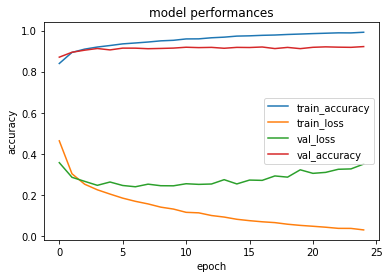

time: 208 ms


In [133]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model performances')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

In [134]:
score = model.evaluate(test_images,test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3801 - accuracy: 0.9121
Test loss: 0.3801368772983551
Test accuracy: 0.9121000170707703
time: 909 ms


It is evident that, compared to the previous model, the test accuracy increased, however, the model is clearly prone to overfitting since the train loss descrease while the validation loss increase. Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data (in this case the test set). This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize. In this case, the validation loss start to increase since the 2°-3° epoch. So, the next and last step of this project is the implementation of an improved model in order to avoid overfitting, keeping the accuracy high.

#### 7.2 Improved model
The model implemented in the next cells is characterized by more layers than the basic one. The datails are shown in the model summary.

In [135]:
model = Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nclasses, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 1568)            

In [136]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

time: 12 ms


In [137]:
epochs = 25
batch_size = 256

history = model.fit(x=train_images, 
                    y=train_labels, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/25
211/211 [==============================] - 2s 8ms/step - loss: 0.7417 - accuracy: 0.7250 - val_loss: 0.4333 - val_accuracy: 0.8385
Epoch 2/25
211/211 [==============================] - 2s 8ms/step - loss: 0.4596 - accuracy: 0.8329 - val_loss: 0.3640 - val_accuracy: 0.8667
Epoch 3/25
211/211 [==============================] - 2s 8ms/step - loss: 0.4067 - accuracy: 0.8529 - val_loss: 0.3375 - val_accuracy: 0.8793
Epoch 4/25
211/211 [==============================] - 2s 8ms/step - loss: 0.3768 - accuracy: 0.8629 - val_loss: 0.3093 - val_accuracy: 0.8897
Epoch 5/25
211/211 [==============================] - 2s 8ms/step - loss: 0.3562 - accuracy: 0.8712 - val_loss: 0.2967 - val_accuracy: 0.8930
Epoch 6/25
211/211 [==============================] - 2s 7ms/step - loss: 0.3387 - accuracy: 0.8753 - val_loss: 0.2913 - val_accuracy: 0.8903
Epoch 7/25
211/211 [==============================] - 2s 8ms/step - loss: 0.3284 - accuracy: 0.8797 - val_loss: 0.2789 - val_accuracy: 0.8952
Epoch 

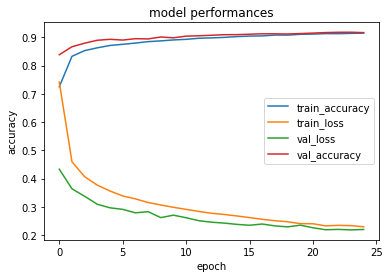

time: 229 ms


In [138]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model performances')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy','train_loss','val_loss','val_accuracy'],loc='right')
plt.show()

In [139]:
score = model.evaluate(test_images,test_labels)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.2284 - accuracy: 0.9162
Test loss: 0.22839856147766113
Test accuracy: 0.9161999821662903
time: 949 ms


The improved model seems to perform better than the basic one, indeed it does not show overfitting, the accuracy reached almost 91% and the test loss has an acceptable value. The performance of this model could be considered satisfactory, even if it could be surely improved using more complex CNN architectures.

The time needed to run all the code in this notebook is ~10 minutes using the GPU as hardware accelerator.

### 8. Conclusions
It is clear that more simple models such as decision tree and random forest, do not achieve a very high accuracy but they do not overfit the data. Instead, CNNs tend to reach a higher accuracy but with the tendency to overfitting. 